# Rebound model (Figure 3)

In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
from metpy.interpolate import interpolate_to_points
from resonance.neuralnodes import utils
from resonance import plotting
from cycler import cycler

from resonance.rebound.model import run_model
from resonance.rebound.params import Params


alphabet = list(string.ascii_uppercase)
plt.style.use('ncb.mplstyle')

## Generate model outputs

In [2]:
fs = 4_000.0
stim_step = .1
max_len = 20

input_stim, s, paui, duri = utils.makePPFstim(ppauMax=max_len, pdurMax=max_len, cdur=400, cpau=0, Fs=fs, step=stim_step)

input_stim = np.array(input_stim)
new_points = np.array([s['ppau'], s['pdur']]).T / fs * 1000
paui = paui / fs * 1000
duri = duri / fs * 1000

params = Params.from_yaml("params/rebound_20230304_143838_66_params.yaml")
print(params)

outs = run_model(input_stim, np.array(params.to_list()), fs)
ppf = np.nanmean(outs[-1][250:-100], axis=0)

ppf = ppf.reshape((len(duri), len(paui)))
# ppf = scipy.ndimage.gaussian_filter(ppf, stim_step * 40)


Params(filter_inh_dur=5.056218765450139, filter_inh_gain=0.04533568195559058, filter_delay=22.931375375835284, filter_exc_dur=2.001406325725762, filter_exc_gain=0.1)


In [3]:
# E/I balance
params.filter_inh_dur * params.filter_inh_gain, params.filter_exc_dur * params.filter_exc_gain
np.max(ppf)

np.float64(0.26968824543277237)

In [4]:
input_stim, s, paui, duri = utils.makePPFstim(ppauMax=max_len, pdurMax=max_len, cdur=400, cpau=0, Fs=fs, step=stim_step)
paui = paui / fs * 1000
duri = duri / fs * 1000

/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92068/4048014781.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


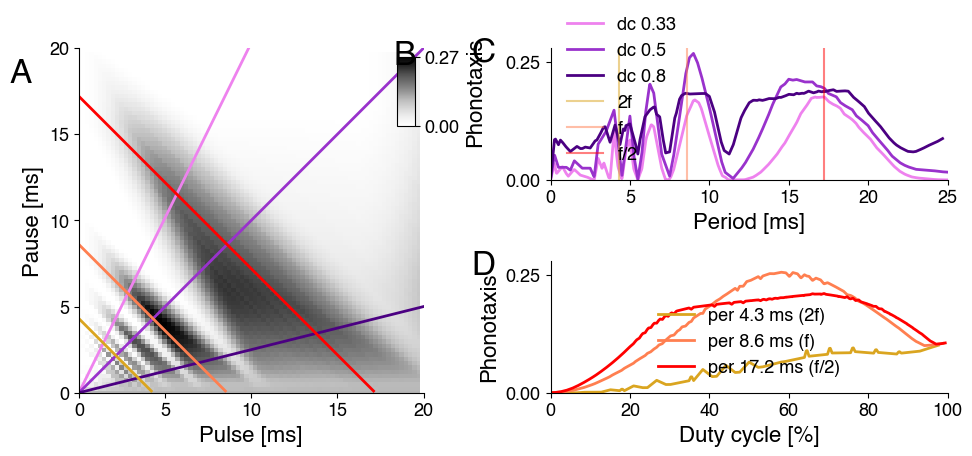

In [5]:
# fig, axs = plt.subplots(nrows=3, ncols=1, height_ratios=[2, 0.8, 0.8],figsize=(5, 10) )
axs = [None, None, None]
plt.figure(figsize=(15, 4.5))
axs[0] = plt.subplot(131)
plotting.ppf(duri, paui, ppf, ax=axs[0])

axs[1] = plt.subplot(232)
axs[2] = plt.subplot(235)

col_dc = ['violet', 'darkorchid', 'indigo']
col_per = ['goldenrod', 'coral', 'red']

dcs = [0.33, 0.5, 0.8]
pers = [4.3, 8.6, 17.2]
# period transects
plt.sca(axs[1])
for dc, col in zip(dcs, col_dc):
    dur = np.arange(0, max_len+0.1, 0.01)
    pau = dur / dc - dur
    dur = dur[pau <= max_len]
    pau = pau[pau <= max_len]
    axs[0].plot(dur, pau, c=col, linewidth=2)
    plt.plot(pau+dur, plotting.transect(new_points, ppf, dur, pau, grid=False), c=col, label=f'dc {dc}', linewidth=2.0)
plt.xlabel('Period [ms]')
for f, c, l in zip(pers, col_per, ['2f', 'f', 'f/2']):
    plt.axvline(f, c=c, alpha=0.5, label=l)
plt.xlim(0, 25)
plt.ylim(0, 0.28)
plt.yticks([0, 0.25])
plt.legend(frameon=False)

# DC transects
plt.sca(axs[2])
per = 10
for per, frq, col in zip(pers, ['2f', 'f', 'f/2'], col_per):
    pau = np.arange(0.1, per, 0.01)
    dur = per - pau
    dc = dur / per
    dur = dur[pau <= max_len]
    pau = pau[pau <= max_len]
    axs[0].plot(dur, pau, c=col, linewidth=2)
    plt.plot(dc * 100, plotting.transect(new_points, ppf, dur, pau, grid=False), c=col, label=f'per {per} ms ({frq})', linewidth=2.0)
plt.xlabel('Duty cycle [%]')
plt.ylabel('Phonotaxis')
# for d, c, l in zip(dcs, col_dc, dcs):
#     plt.axvline(d * 100, c=c, alpha=0.5, label=l)
plt.xlim(0, 100)
plt.ylim(0, 0.28)
plt.yticks([0, 0.25])
plt.legend(frameon=False)


plotting.label_axes()
plt.tight_layout()

plt.savefig('fig/Fig_rebound.pdf')

### Freq tuning

In [6]:
outs = run_model(input_stim, params, fs, verbose_output=True)
outs[:5]
tuning_coarse = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs[:5])[[0, 1, 4]]]).T


<>:78: SyntaxWarning: invalid escape sequence '\D'
<>:78: SyntaxWarning: invalid escape sequence '\D'
<>:78: SyntaxWarning: invalid escape sequence '\D'
<>:78: SyntaxWarning: invalid escape sequence '\D'
<>:78: SyntaxWarning: invalid escape sequence '\D'
<>:78: SyntaxWarning: invalid escape sequence '\D'
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92068/1167784204.py:78: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92068/1167784204.py:78: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92068/1167784204.py:78: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):


ppers [34.4, 17.2, 8.6, 5.73, 4.3]
pdurs [11.35, 5.68, 2.84, 1.89, 1.42]
ppaus [23.05, 11.52, 5.76, 3.84, 2.88]
pdcs [0.33, 0.33, 0.33, 0.33, 0.33]


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


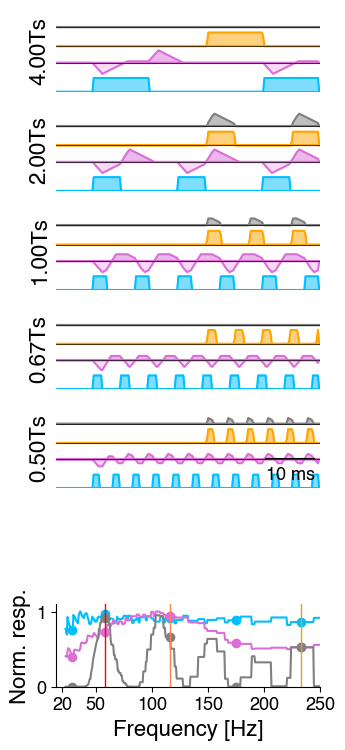

In [7]:
dt = fs/1000
T = 8.6
ppers = T / np.array((0.25, 0.5,   1 ,  1.5,   2))
pdurs= ppers * 0.33
ppaus= ppers - pdurs
pdcs = pdurs / ppers
print('ppers', [float(f"{p:1.2f}") for p in (pdurs + ppaus)])
print('pdurs', [float(f"{p:1.2f}") for p in pdurs])
print('ppaus', [float(f"{p:1.2f}") for p in ppaus])
print('pdcs', [float(f"{p:1.2f}") for p in pdcs])

cols = ['deepskyblue', 'orange', 'orchid', 'grey']
custom_cycler = cycler(color=cols)

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
input_stim = np.array(input_stim)
# params = Params.from_yaml(f'../rebound/res.{variant}/{datename}/{datename}_{run}_params.yaml')
params = Params.from_yaml("params/rebound_20230304_143838_66_params.yaml")

outs = run_model(input_stim, params, fs, verbose_output=True)

tuning_coarse = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs[:5])[[0, 1, 4]]]).T
ppers_coarse = ppers


t0 = 0 + 20
t1 = 530 // 10 * 4 + 20
stis = np.arange(len(ppers))
# titles = [f'pper {pper:1.1f}ms, dc{int(pdc * 100)}' for pper, pdc in zip(ppers, pdcs)]
titles = [f'{pper/T:1.2f}Ts' for pper in ppers]


plt.figure(figsize=(7.5, 8.8))
for cnt, (sti, title) in enumerate(zip(stis, titles)):

    # plt.axes(ax[lab])
    ax = plt.subplot(len(ppers) + 2, 2, 2*cnt+1)
    plt.ylabel(title)
    plotting.pulse(outs[0][t0:t1, sti], c='deepskyblue', dt=dt)
    reb_neg = np.clip(outs[1][t0:t1, sti], -np.inf, 0)
    reb_pos = np.clip(outs[1][t0:t1, sti], 0, np.inf)
    plotting.pulse(reb_neg, offset=2.1, c='orchid', alpha=0.25, dt=dt)
    plotting.pulse(reb_pos, offset=2.1, c='orchid', dt=dt)
    plotting.pulse(outs[3][t0:t1, sti], offset=3.3, c='orange', dt=dt)
    plotting.pulse(outs[4][t0:t1, sti], offset=4.7, c='grey', dt=dt)

    plt.xlim(0, (t1-t0) / dt)
    plt.ylim(0, 6)
    plotting.despine('tbrl')

plotting.scalebar(10, units='ms')

ppers = T / np.arange(0.4,  4.5, 0.01) * 2
pdurs= ppers * 0.33
ppaus= ppers - pdurs
pdcs = pdurs / ppers

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
input_stim = np.array(input_stim)
# params = Params.from_yaml(f'../rebound/res.{variant}/{datename}/{datename}_{run}_params.yaml')
params = Params.from_yaml("params/rebound_20230304_143838_66_params.yaml")
outs_all = run_model(input_stim, params, fs, verbose_output=True)

tuning = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs_all[:5])[[0, 1,4]]]).T

nrm = np.max(tuning, axis=0, keepdims=True)
ax = plt.subplot(7, 2, 13)
ax.set_prop_cycle(cycler(color=['deepskyblue', 'orchid', 'grey']))
plt.plot(1000/ppers, tuning / nrm, '-')
plt.plot(1000/ppers_coarse, tuning_coarse / nrm, 'o')
plt.xlim(15, 250)
plt.ylim(0, 1.1)
plt.yticks([0, 1])
plt.xticks([20, 50, 100, 150, 200, 250])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Norm. resp.')

for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
    plt.axvline(f*1000, c=c, linewidth=1.0, label=l)

# plt.tight_layout()
plt.savefig('fig/Fig_rebound_freq.pdf')

#### DC tuning

ppers [25.8, 25.8, 25.8]
pdurs [8.51, 17.29, 24.51]
ppaus [17.29, 8.51, 1.29]
pdcs [0.33, 0.67, 0.95]
60 272
ppers [12.9, 12.9, 12.9]
pdurs [4.26, 8.64, 12.25]
ppaus [8.64, 4.26, 0.65]
pdcs [0.33, 0.67, 0.95]
60 272


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


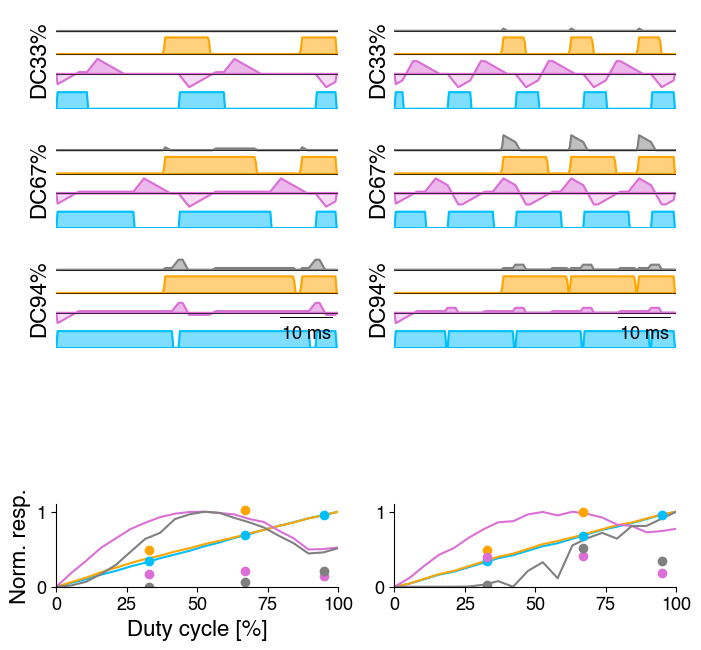

In [8]:
cols = ['deepskyblue', 'orange', 'orchid', 'grey']
custom_cycler = cycler(color=cols)

plt.figure(figsize=(8, 7.5))

for Tcnt, T in enumerate([17.2, 8.6]):
    ppers = T / np.ones((3,)) * 1.5
    pdurs= ppers * np.array([0.33, 0.67, 0.95])
    ppaus= ppers - pdurs
    pdcs = pdurs / ppers
    print('ppers', [float(f"{p:1.2f}") for p in (pdurs + ppaus)])
    print('pdurs', [float(f"{p:1.2f}") for p in pdurs])
    print('ppaus', [float(f"{p:1.2f}") for p in ppaus])
    print('pdcs', [float(f"{p:1.2f}") for p in pdcs])

    input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
    input_stim = np.array(input_stim)
    # params = Params.from_yaml(f'../rebound/res.{variant}/{datename}/{datename}_{run}_params.yaml')
    params = Params.from_yaml("params/rebound_20230304_143838_66_params.yaml")

    outs = run_model(input_stim, params, fs, verbose_output=True)

    tuning_coarse = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs[:5])[[0,3,1,4]]]).T
    pdcs_coarse = pdcs

    t0 = 60
    t1 = t0+530 // 10 * 4
    print(t0, t1)
    stis = np.arange(len(ppers))
    # titles = [f'pper {pper:1.1f}ms, dc{int(pdc * 100)}' for pper, pdc in zip(ppers, pdcs)]
    titles = [f'DC{int(pdc * 100)}%' for pper, pdc in zip(ppers, pdcs)]

    for cnt, (sti, title) in enumerate(zip(stis, titles)):
        ax = plt.subplot(len(ppers) + 2, 2, 2*cnt+1 + Tcnt)
        plt.ylabel(title)
        plotting.pulse(outs[0][t0:t1, sti], c='deepskyblue', dt=dt)
        reb_neg = np.clip(outs[1][t0:t1, sti], -np.inf, 0)
        reb_pos = np.clip(outs[1][t0:t1, sti], 0, np.inf)
        plotting.pulse(reb_neg, offset=2.1, c='orchid', alpha=0.25, dt=dt)
        plotting.pulse(reb_pos, offset=2.1, c='orchid', dt=dt)
        plotting.pulse(outs[3][t0:t1, sti], offset=3.3, c='orange', dt=dt)
        plotting.pulse(outs[4][t0:t1, sti], offset=4.7, c='grey', dt=dt)

        plt.xlim(0, (t1-t0) / dt)
        plt.ylim(0, 6)
        plotting.despine('tbrl')

    plotting.scalebar(10, units='ms')


    ppers = T / np.ones((20,)) * 1.5
    ppers = np.array(ppers)
    pdurs= ppers * np.linspace(0, 1, 20)
    ppaus= ppers - pdurs
    pdcs = pdurs / ppers

    input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
    input_stim = np.array(input_stim)
    # params = Params.from_yaml(f'../rebound/res.{variant}/{datename}/{datename}_{run}_params.yaml')
    outs = run_model(input_stim, params, fs, verbose_output=True)

    tuning = np.array([np.nanmean(np.clip(out[250:-100, :], 0, np.inf), axis=0) for out in np.array(outs[:5])[[0,3,1,4]]]).T
    nrm = np.nanmax(tuning, axis=0, keepdims=True)
    # plt.show()
    ax = plt.subplot(6, 2, 6*2-1+Tcnt)
    ax.set_prop_cycle(custom_cycler)
    plt.plot(pdcs * 100, tuning / nrm, '-')
    plt.plot(pdcs_coarse * 100, tuning_coarse / nrm, 'o')
    plt.xticks([0, 25, 50,75, 100])
    plt.ylim(0, 1.1)
    plt.yticks([0, 1])
    if Tcnt==0:
        plt.xlabel('Duty cycle [%]')
        plt.ylabel('Norm. resp.')

plt.savefig('fig/Fig_rebound_dc.pdf')


/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92068/3042977280.py:62: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


ppers [40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
pdurs [0.8, 2.4, 4.0, 5.6, 7.2, 8.8, 10.4, 12.0]
ppaus [39.2, 37.6, 36.0, 34.4, 32.8, 31.2, 29.6, 28.0]
pdcs [0.02, 0.06, 0.1, 0.14, 0.18, 0.22, 0.26, 0.3]
Params(filter_inh_dur=5.056218765450139, filter_inh_gain=0.04533568195559058, filter_delay=22.931375375835284, filter_exc_dur=2.001406325725762, filter_exc_gain=0.1)
Params(filter_inh_dur=5.056218765450139, filter_inh_gain=0.04533568195559058, filter_delay=22.931375375835284, filter_exc_dur=2.001406325725762, filter_exc_gain=0.1)


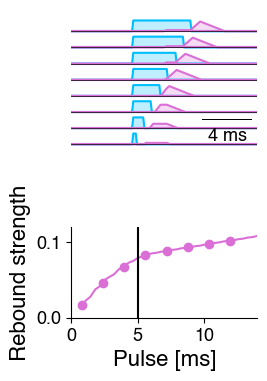

In [9]:
n = np.arange(0.02, 0.32, 0.04)
ppers = 20.0 / (0.5 * np.ones((len(n),)))
pdurs= ppers * n
ppaus= ppers - pdurs
pdcs = pdurs / ppers
print('ppers', [float(f"{p:1.2f}") for p in (pdurs + ppaus)])
print('pdurs', [float(f"{p:1.2f}") for p in pdurs])
print('ppaus', [float(f"{p:1.2f}") for p in ppaus])
print('pdcs', [float(f"{p:1.2f}") for p in pdcs])

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)

params = Params.from_yaml("params/rebound_20230304_143838_66_params.yaml")
print(params)
outs = run_model(input_stim, np.array(params.to_list()), fs, verbose_output=True)
tune_coarse = np.nanmean(np.clip(outs[1][0:150, :], 0, np.inf), axis=0)
pdurs_coarse = pdurs
stis = np.arange(len(ppers))
titles = [f'pper {pper:1.1f}ms ({pper/18:1.2f}f), dc{int(pdc * 100)}' for pper, pdc in zip(ppers, pdcs)]

t0 = 0
t1 = 150

plt.figure(figsize=(2.4, 4))
for cnt, (sti, title) in enumerate(zip(stis, titles)):

    plt.subplot(211)
    plotting.pulse(outs[0][t0:t1, sti], offset=cnt * 1.5, c='deepskyblue', alpha=0.25, dt=1/stim_step)
    reb_pos = np.clip(outs[1][t0:t1, sti], 0, np.inf)
    plotting.pulse(reb_pos, offset=cnt * 1.5, c='orchid', alpha=0.25, dt=1/stim_step)

plt.ylim(-0.5, len(pdurs)*1.5+0.5)
plt.axis('off')
plotting.scalebar(4, units='ms')

n = np.arange(0.02, 0.4, 0.01)
ppers = 18.0 / (0.5 * np.ones((len(n),)))
pdurs= ppers * n
ppaus= ppers - pdurs
pdcs = pdurs / ppers

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)

params = Params.from_yaml("params/rebound_20230304_143838_66_params.yaml")
print(params)
# params.filter_exc_gain = 3
outs = run_model(input_stim, np.array(params.to_list()), fs, verbose_output=True)
tune = np.nanmean(np.clip(outs[1][0:150, :], 0, np.inf), axis=0)

ax = plt.subplot(313)

plt.plot(pdurs, tune, c='orchid')
plt.plot(pdurs_coarse, tune_coarse, 'o', c='orchid')

plt.xlim(pdurs[0]-1, pdurs[-1]+1)
plt.xlabel('Pulse [ms]')
plt.xlim(0, max(pdurs))
plt.ylabel('Rebound strength')
plt.ylim(0, 0.12)
plt.axvline(params.filter_inh_dur, c='k')

plt.tight_layout()
plt.savefig('fig/Fig_rebound_buildup.pdf')
plt.show()


#### Rebound is suppressed by short pauses

ppers [12.4, 13.77, 15.14, 16.51, 17.89, 19.26, 20.63, 22.0]
pdurs [12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
ppaus [0.4, 1.77, 3.14, 4.51, 5.89, 7.26, 8.63, 10.0]
pdcs [0.97, 0.87, 0.79, 0.73, 0.67, 0.62, 0.58, 0.55]


/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92068/1701415501.py:67: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


Params(filter_inh_dur=5.056218765450139, filter_inh_gain=0.04533568195559058, filter_delay=22.931375375835284, filter_exc_dur=2.001406325725762, filter_exc_gain=0.1)
Params(filter_inh_dur=5.056218765450139, filter_inh_gain=0.04533568195559058, filter_delay=22.931375375835284, filter_exc_dur=2.001406325725762, filter_exc_gain=0.1)


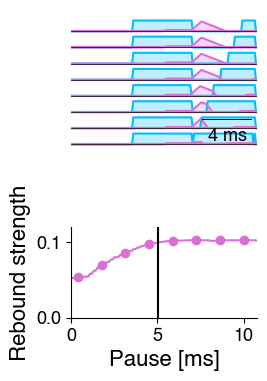

In [10]:
n = np.linspace(0.02, 0.5, 8)
pdurs = 12.0 * np.ones((len(n),))
ppaus= 20.0 * n
ppers = pdurs + ppaus
pdurs= ppers - ppaus
pdcs = pdurs / ppers
print('ppers', [float(f"{p:1.2f}") for p in (pdurs + ppaus)])
print('pdurs', [float(f"{p:1.2f}") for p in pdurs])
print('ppaus', [float(f"{p:1.2f}") for p in ppaus])
print('pdcs', [float(f"{p:1.2f}") for p in pdcs])

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)

params = Params.from_yaml("params/rebound_20230304_143838_66_params.yaml")
print(params)
# params.filter_exc_gain = 3
outs = run_model(input_stim, np.array(params.to_list()), fs, verbose_output=True)

stis = np.arange(len(ppers))
titles = [f'pper {pper:1.1f}ms ({pper/18:1.2f}f), dc{int(pdc * 100)}' for pper, pdc in zip(ppers, pdcs)]
tune_coarse = np.nanmean(np.clip(outs[1][0:150, :], 0, np.inf), axis=0)
ppaus_coarse = ppaus

t0 = 0
t1 = 150

plt.figure(figsize=(2.4, 4))
for cnt, (sti, title) in enumerate(zip(stis, titles)):

    plt.subplot(211)
    plotting.pulse(outs[0][t0:t1, sti], offset=cnt * 1.5, c='deepskyblue', alpha=0.25, dt=1/stim_step)
    reb_pos = np.clip(outs[1][t0:t1, sti], 0, np.inf)
    plotting.pulse(reb_pos, offset=cnt * 1.5, c='orchid', alpha=0.25, dt=1/stim_step)

plt.ylim(-0.5, len(ppaus)*1.5+0.5)
plt.axis('off')
plotting.scalebar(4, units='ms')

n = np.linspace(0.0, 0.6, 100)
pdurs = 12.0 * np.ones((len(n),))
ppaus= 18.0 * n
ppers = pdurs + ppaus
pdurs= ppers - ppaus
pdcs = pdurs / ppers

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)

params = Params.from_yaml("params/rebound_20230304_143838_66_params.yaml")
print(params)
# params.filter_exc_gain = 3
outs = run_model(input_stim, np.array(params.to_list()), fs, verbose_output=True)
tune = np.nanmean(np.clip(outs[1][0:150, :], 0, np.inf), axis=0)

ax = plt.subplot(313)

plt.plot(ppaus, tune, c='orchid')
plt.plot(ppaus_coarse, tune_coarse, 'o', c='orchid')

plt.xlim(ppaus[0]-1, ppaus[-1]+1)
# plt.xticks(ppaus)
plt.xlim(0, max(ppaus))
plt.xlabel('Pause [ms]')
plt.ylim(0, 0.12)
plt.axvline(params.filter_inh_dur, c='k')
plt.ylabel('Rebound strength')

plt.tight_layout()
plt.savefig('fig/Fig_rebound_suppression.pdf')
plt.show()
